In [38]:
import requests
from cascid.configs import pad_ufes_cnf as pad_ufes
from cascid.configs import config
from cascid.datasets.pad_ufes import database
import base64
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [39]:
df = database.get_df()
df


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


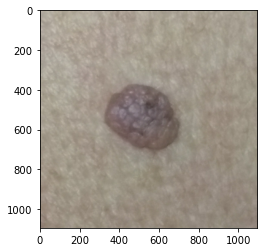

b'iVBORw0KGgoAAAANSUhEUgAABEcAAARHCAYAAAARJg2OAACAAElEQVR42oy955YmR5JkWS++ZGa6CgUk58E5RQQigEAmMhvAVp/afbBYFzW7amL6eaDnhx7/OHFqek1U9G8PN0ePDzfHGZ9vTx4/351GfPvlIuLr/Xnc/3J/Fre15Pbn+9PHh7vlvb8s7304eXy4P4z4HPePepxEfLk/jvj269njH18uMr49nC+P9eUSX385W75Pv+ewx/7jw+3B8tjyufdH8RlffzlZXnsa8WX5DZ/vTyJ0W+/nM3//fBnx52/Xj//1+93j//evh4h//3Efj8X3/nLeY/m85TO+3i6/+eagfe/13rJOlrjbb8t+++vyHxVf7g/it7XYe/z5Zifi4WY37j/09+j+z9fbPT4t97ci4vbV9vI9O7G8O//4+NPZh4j7i0+5JPT87fmHxx9P3z1en7yNuDx6/Xh1/Cbv/3i8LI/exOMXh68eL7Rc4rKHXqv3E7xPj+v5fGz5DH2W4ubk3eNPxy3uTz9E6Lf8fLkVv+vz8v++Ldvm92W7f1vWC/Hldj/i881e3m73dyP8v+uz4n4PPpv1cHv6Pn6HgttXh68fz/afPZ7u/bDE84jzg5ftfx4t/+P4/fLf30ZcLr/96uT9448ny2edLevyYvvx/nKnbecbbd/l996Nba+l9ofcL7T/Ls976D3sD98ejkf8chSvj+dvjiJ0X5+lZdzun/3Hr+e5/NdvVxn/9e0mIu5/Xfbfb7fLUvdb/Pn5Kvfd3x+W/Xg5Jj/fHuf3fY5jW//pJELP6f7PV/vL/96LpeLuYjfuEzz+cH2Qt4n43P4dvFfrUfHT+VbEjyeflnX/4fHy8H0ur48/Pt6cfoz1rtA20Pap26LFXv7Gn853lue3l/e2z9VS3xGvP1/2kYud+J36X1+Xc5fWAetD6yfW1bcWfy7rTse8zgdx3Hv08w7nIEWsM63D/vm5js6X/3zWfif/X/sL21

In [77]:
sample_image = str(pad_ufes.IMAGES_DIR / df.sample(1)["img_id"].iloc[0])
img = cv2.imread(sample_image)[:,:,::-1]
plt.imshow(img)
plt.show()

with open(sample_image, "rb") as imbytes:
    b = imbytes.read()
    imb = str(b)
    b64 = base64.b64encode(b)
print(b64)

In [78]:
import json

class BytesEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, bytes):
            return obj.decode('utf-8')
        return json.JSONEncoder.default(self, obj)

d = {'image_to_base64': str(b64, encoding="utf-8")}
j = json.dumps(d, cls=BytesEncoder)

resp = requests.post("http://localhost:8000/upload", data=j, headers={'Content-Type': 'application/json'})

In [79]:
path = json.loads(resp.content)["path"]
path


'1bbc8cfb-a1a5-4b27-a075-928cea607535.jpg'

In [80]:
import json
resp2 = requests.get("http://localhost:8000/hed_images/{}/".format(path))

In [81]:
img_bytes = resp2.content
type(img_bytes)

bytes

<class 'numpy.ndarray'>


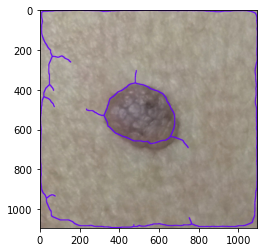

In [82]:
jpg_as_np = np.frombuffer(img_bytes, dtype=np.uint8)
img = cv2.imdecode(jpg_as_np, flags=1)
print(type(img))
plt.imshow(img)

<class 'numpy.ndarray'>


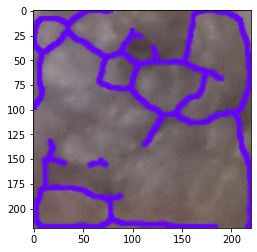

In [83]:
import json
resp2 = requests.get("http://localhost:8000/hed_images_zoom/{}/".format(path))
img_bytes = resp2.content

jpg_as_np = np.frombuffer(img_bytes, dtype=np.uint8)
img = cv2.imdecode(jpg_as_np, flags=1)
print(type(img))
plt.imshow(img)